In [74]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import calendar
import seaborn as sns

In [75]:
logins_df = pd.read_json('data/logins.json')
logins_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
logins_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [5]:
logins_df.shape

(93142, 1)

In [6]:
# Check quality of data
logins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [7]:
logins_df.set_index('login_time')
logins_df['count'] = 1

In [8]:
login_interval = logins_df.resample('15T', on='login_time', label='right').sum()
login_interval.head()

,count
login_time,
1970-01-01 20:15:00,2
1970-01-01 20:30:00,6
1970-01-01 20:45:00,9
1970-01-01 21:00:00,7
1970-01-01 21:15:00,1


In [9]:
# No null values
login_interval.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:15:00 to 1970-04-13 19:00:00
Freq: 15T
Data columns (total 1 columns):
count    9788 non-null int64
dtypes: int64(1)
memory usage: 152.9 KB


In [10]:
login_interval['time'] = pd.to_datetime(login_interval.index)

In [11]:
print(type(login_interval.time[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [12]:
login_interval['month'] = login_interval.time.dt.month
login_interval['day'] = login_interval.time.dt.day
login_interval['hour'] = login_interval.time.dt.hour
login_interval['week'] = login_interval.time.dt.week
login_interval['weekday'] = login_interval.time.dt.weekday

In [13]:
login_interval.head()

,count,time,month,day,hour,week,weekday
login_time,,,,,,,
1970-01-01 20:15:00,2,1970-01-01 20:15:00,1,1,20,1,3
1970-01-01 20:30:00,6,1970-01-01 20:30:00,1,1,20,1,3
1970-01-01 20:45:00,9,1970-01-01 20:45:00,1,1,20,1,3
1970-01-01 21:00:00,7,1970-01-01 21:00:00,1,1,21,1,3
1970-01-01 21:15:00,1,1970-01-01 21:15:00,1,1,21,1,3


In [16]:
# Group by month
print ('[Grouping by month]')
print (login_interval.groupby('month')['count'].aggregate(np.sum))

[Grouping by month]
month
1    21225
2    24669
3    33727
4    13521
Name: count, dtype: int64


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

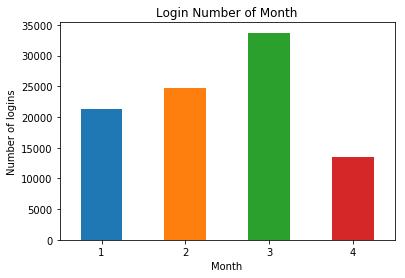

In [19]:
# Plot group by month
login_interval.groupby('month')['count'].sum().plot(kind='bar')
plt.title("Login Number of Month")
plt.xlabel("Month")
plt.ylabel("Number of logins")
plt.xticks(rotation=0)

Login number kept increasing from January to March. The login number of March is highest. 
Because there are only 13 days data in April, so it is not enough to compare with other months.

In [20]:
# Group by week
print ('[Grouping by week]')
print (login_interval.groupby('week')['count'].aggregate(np.sum))

[Grouping by week]
week
1     2368
2     5218
3     5021
4     4750
5     4747
6     5564
7     5914
8     7038
9     6554
10    7400
11    7329
12    8959
13    7284
14    8096
15    6496
16     404
Name: count, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

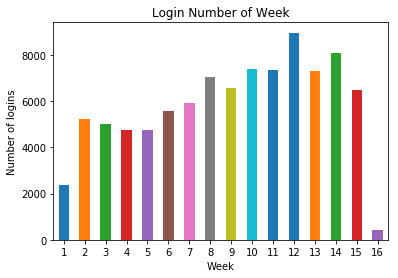

In [21]:
# Plot group by week
login_interval.groupby('week')['count'].sum().plot(kind='bar')
plt.title("Login Number of Week")
plt.xlabel("Week")
plt.ylabel("Number of logins")
plt.xticks(rotation=0)

Logins in week 12 are the most. 
It is the last week of March. Logins in week 14 are the second most. It is the second week of April.

In [23]:
# Group by weekday
num_week = 16   # total weeks 
print ('[Grouping by weekday]')
print (login_interval.groupby('weekday')['count'].aggregate(np.sum)/num_week)

[Grouping by weekday]
weekday
0     553.0625
1     576.6250
2     642.6250
3     746.9375
4     947.0000
5    1214.6250
6    1140.5000
Name: count, dtype: float64


[Text(0,0,'Monday'),
 Text(0,0,'Tuesday'),
 Text(0,0,'Wednesday'),
 Text(0,0,'Thursday'),
 Text(0,0,'Friday'),
 Text(0,0,'Saturday'),
 Text(0,0,'Sunday')]

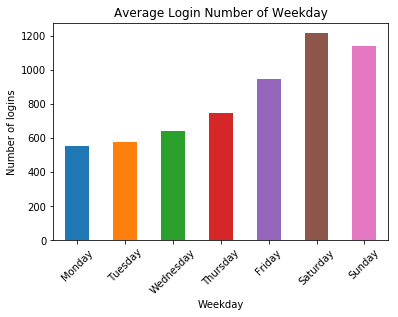

In [24]:
# Bar plot group by weekday
ax = (login_interval.groupby('weekday')['count'].sum()/num_week).plot(kind='bar')
plt.title("Average Login Number of Weekday")
plt.xlabel("Weekday")
plt.ylabel("Number of logins")
plt.xticks(rotation=45)
ax.set_xticklabels([calendar.day_name[d] for d in range(7)])

Login number kept increasing from Monday to Saturday. There are more logins in weekends than in weekdays. 
Logins on Saturday are the most, and logins on Sunday are the second most, while logins on Friday are the third most.

In [48]:
# Aggregate login counts based on 1-day time intervals
logins_day = logins_df.resample('D', on='login_time').sum()
logins_day.head(7)

,count
login_time,
1970-01-01,112
1970-01-02,681
1970-01-03,793
1970-01-04,788
1970-01-05,459
1970-01-06,536
1970-01-07,648


In [50]:
# Add date and weekday number
logins_day['date'] = pd.to_datetime(logins_day.index)
logins_day['weekday'] = logins_day.date.dt.weekday
logins_day.head(7)

,count,date,weekday
login_time,,,
1970-01-01,112,1970-01-01,3
1970-01-02,681,1970-01-02,4
1970-01-03,793,1970-01-03,5
1970-01-04,788,1970-01-04,6
1970-01-05,459,1970-01-05,0
1970-01-06,536,1970-01-06,1
1970-01-07,648,1970-01-07,2


[Text(0,0,'Monday'),
 Text(0,0,'Tuesday'),
 Text(0,0,'Wednesday'),
 Text(0,0,'Thursday'),
 Text(0,0,'Friday'),
 Text(0,0,'Saturday'),
 Text(0,0,'Sunday')]

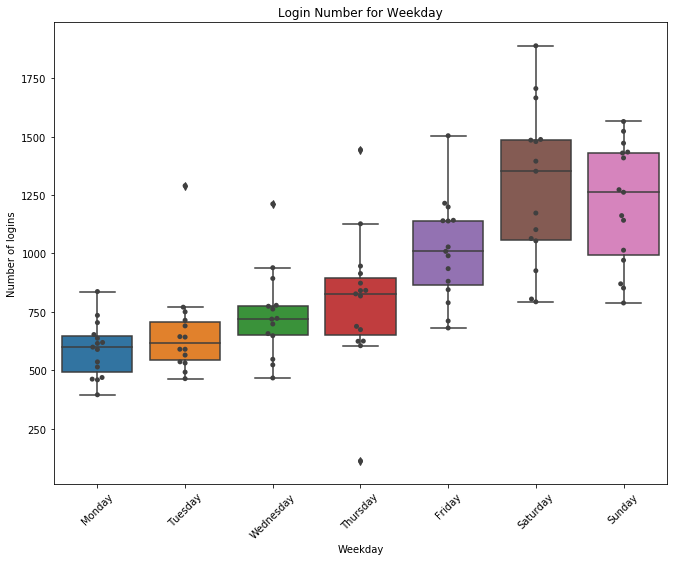

In [51]:
# Box plot single day aggregation
fig = plt.gcf()
fig.set_size_inches(11., 8.5)
ax = sns.boxplot(x='weekday', y='count', data=logins_day)
ax = sns.swarmplot(x='weekday', y='count', data=logins_day, color='.25')
plt.title("Login Number for Weekday")
plt.xlabel("Weekday")
plt.ylabel("Number of logins")
plt.xticks(rotation=45)
ax.set_xticklabels([calendar.day_name[d] for d in range(7)])

We can get reletively same result form the boxplot above. 
But there were some outliers on Tuesday, Wednesday and Thurday. 
Login numbers on weekends varied most.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

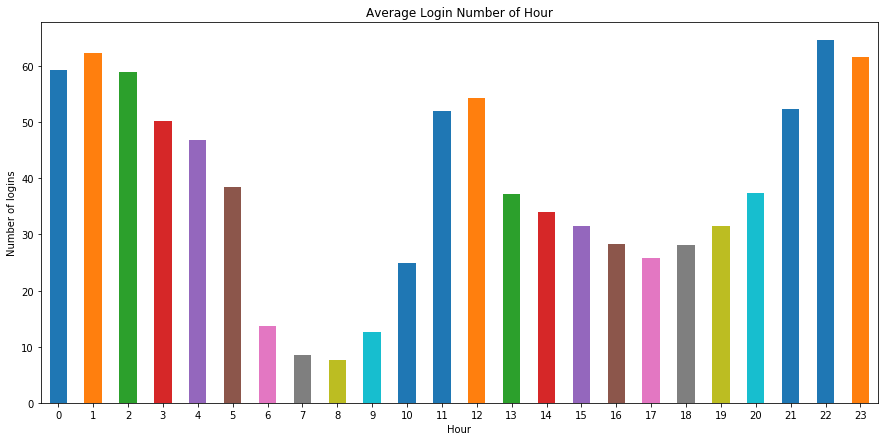

In [69]:
# Bar plot logins based on hour
# sort out for total days
num_day = (30+28+30+13)
(login_interval.groupby('hour')['count'].sum()/num_day).plot(kind='bar', figsize=(15,7))
plt.title("Average Login Number of Hour")
plt.xlabel("Hour")
plt.ylabel("Number of logins")
plt.xticks(rotation=0)

Most logins are at night, from 10 PM to 2 AM. 
Least logins are in the moring. 
There are more logins at noon around lunch time.

In [68]:
# Aggregate login counts based on 1-hour time intervals
login_hour = logins_df.resample('H', on='login_time').sum()
login_hour.head()

,count
login_time,
1970-01-01 20:00:00,24
1970-01-01 21:00:00,9
1970-01-01 22:00:00,21
1970-01-01 23:00:00,58
1970-01-02 00:00:00,53


In [70]:
# Add time and hour
login_hour['time'] = pd.to_datetime(login_hour.index)
login_hour['hour'] = login_hour.time.dt.hour
login_hour.head()

,count,time,hour
login_time,,,
1970-01-01 20:00:00,24,1970-01-01 20:00:00,20
1970-01-01 21:00:00,9,1970-01-01 21:00:00,21
1970-01-01 22:00:00,21,1970-01-01 22:00:00,22
1970-01-01 23:00:00,58,1970-01-01 23:00:00,23
1970-01-02 00:00:00,53,1970-01-02 00:00:00,0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

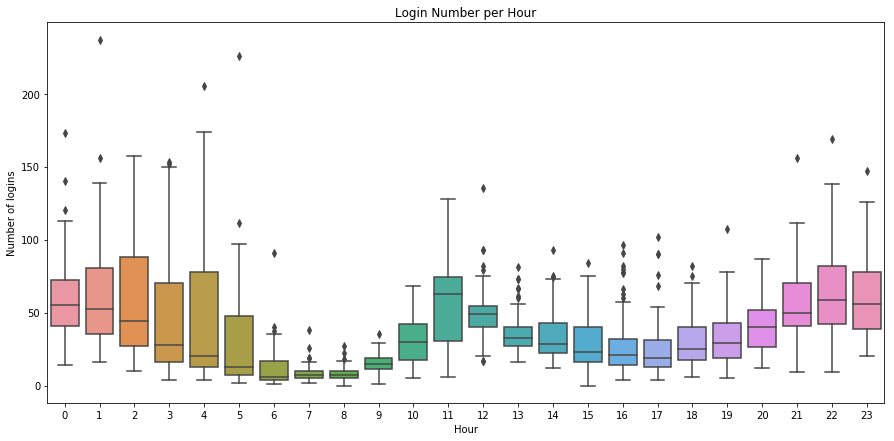

In [73]:
# Box plot login number for each hour
sns.mpl.rc("figure", figsize=(15,7))
sns.boxplot(x='hour', y='count', data=login_hour)
plt.title("Login Number per Hour")
plt.xlabel("Hour")
plt.ylabel("Number of logins")
plt.xticks(rotation=0)

From this boxplot, we can see the same trend as in the hourly bar chart. 
We do find several outliers in this plot. The largest variation occurs from 2 to 4 AM.

Findings:

1. Login counts kept increasing from January to March and reached the peak in March.

2. In a week's step, login counts rised and droped a little. Logins in week 12 are the most. It is the last week of March. Logins in week 14 are the second most. It is the second week of April.
    
3. Login number kept increasing from Monday to Saturday. There are more logins in weekends than in weekdays. Logins on Saturday are the most, and logins on Sunday are the second most, while logins on Friday are the third most. Login numbers on weekends varied most.
    
4. Most logins are at night, from 10 PM to 2 AM. Least logins are in the moring. There are more logins at noon than in the afternoon. Login counts varied most from 2 AM to 4 AM.